In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
passageiros = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv')

In [4]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [5]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22

<AxesSubplot: xlabel='tempo', ylabel='passageiros'>

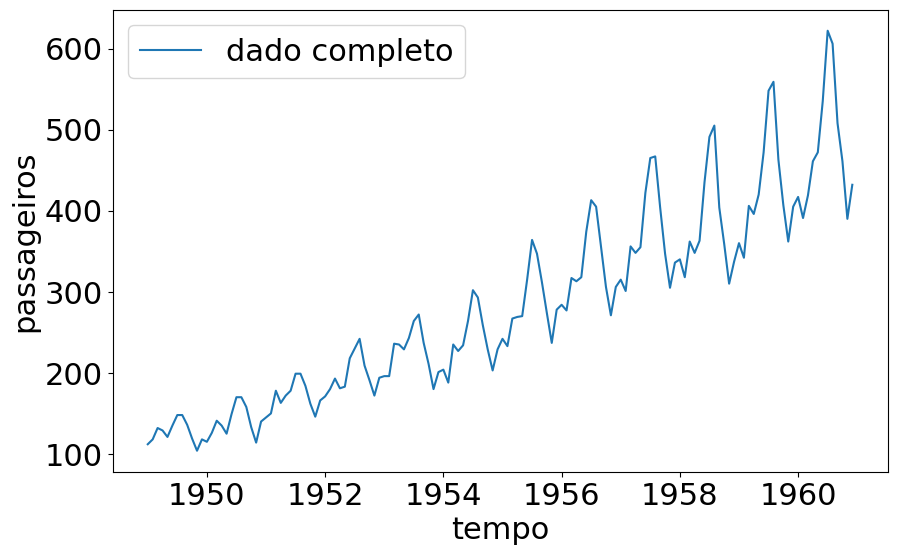

In [6]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado completo')

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [8]:
sc.fit(passageiros)

StandardScaler()

In [9]:
dados_escalados = sc.transform(passageiros)

In [10]:
x = dados_escalados[:,0]
y = dados_escalados[:,1]

Text(0.5, 0, 'data')

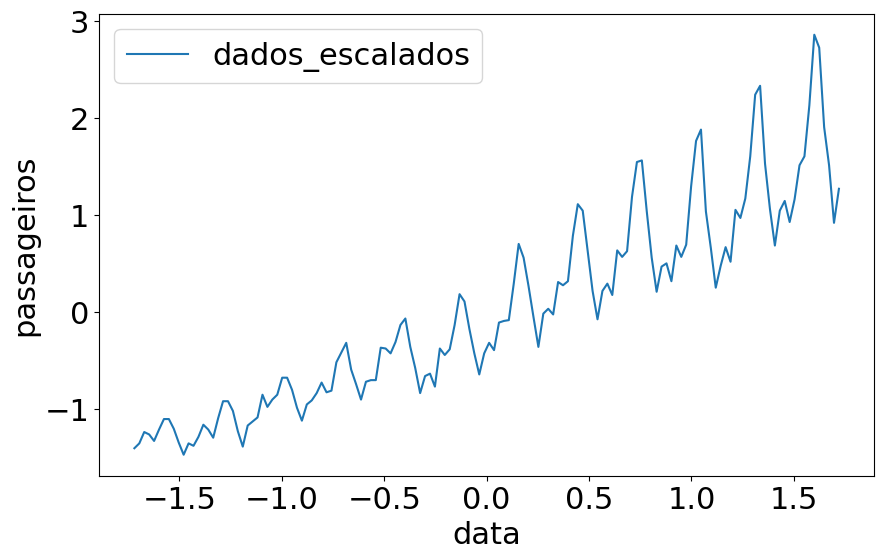

In [11]:
sns.lineplot(x=x, y=y, label='dados_escalados')
plt.ylabel('passageiros')
plt.xlabel('data')

In [12]:
tamanho_treino = int(len(passageiros) * 0.9)
tamanho_teste = len(passageiros) - tamanho_treino

In [13]:
x_treino = x[0:tamanho_treino]
y_treino = y[0:tamanho_treino]

In [14]:
x_teste = x[tamanho_treino:len(passageiros)]
y_teste = y[tamanho_treino:len(passageiros)]

<AxesSubplot: >

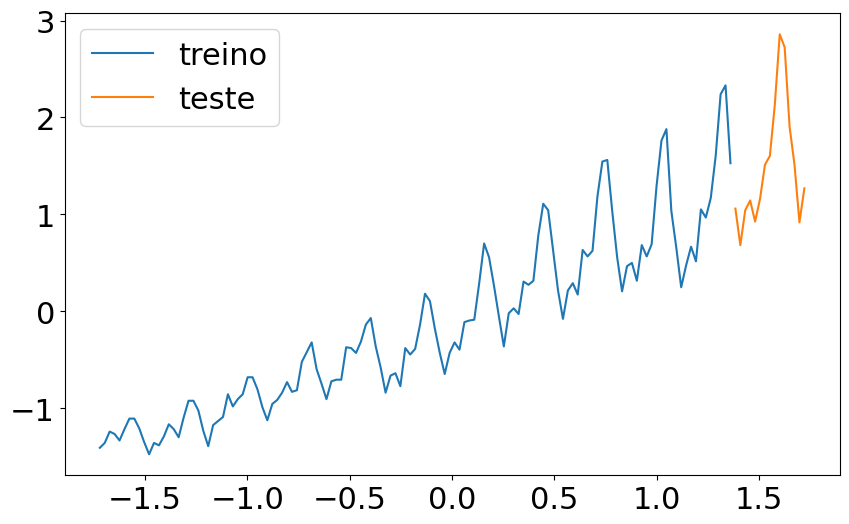

In [15]:
sns.lineplot(x=x_treino, y=y_treino, label='treino')
sns.lineplot(x=x_teste, y=y_teste, label='teste')

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
regressor = Sequential()

In [18]:
regressor.add(Dense(1,input_dim=1, kernel_initializer='Ones', use_bias=False, activation='linear'))

In [19]:
regressor.compile(loss='mean_squared_error', optimizer='adam')

In [20]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [21]:
regressor.fit(x_treino, y_treino)

5/5 [==============================] - 0s 4ms/step - loss: 0.1284


In [22]:
y_predict = regressor.predict(x_treino)

5/5 [==============================] - 0s 1ms/step


<AxesSubplot: >

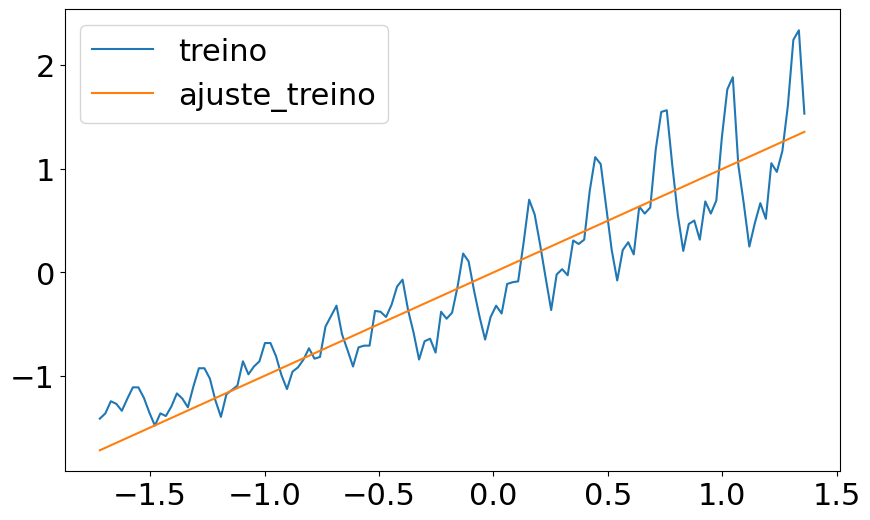

In [23]:
sns.lineplot(x=x_treino, y=y_treino, label='treino')
sns.lineplot(x=x_treino, y=y_predict[:,0], label='ajuste_treino')

In [24]:
d = {'tempo' : x_treino,
     'passageiros' : y_predict[:,0]     
}

In [25]:
resultados = pd.DataFrame(data=d)

In [26]:
resultados

,tempo,passageiros
0,-1.720064,-1.712502
1,-1.696007,-1.688551
2,-1.671950,-1.664600
3,-1.647894,-1.640649
4,-1.623837,-1.616698
...,...,...
124,1.262984,1.257432
125,1.287041,1.281383
126,1.311098,1.305334
127,1.335155,1.329285


In [27]:
resultados_tranf = sc.inverse_transform(resultados)

In [28]:
resultados_tranf = pd.DataFrame(resultados_tranf)

In [29]:
resultados_tranf.columns = ['tempo', 'passageiros']

In [30]:
resultados_tranf

,tempo,passageiros
0,1949.000000,75.570652
1,1949.083333,78.433978
2,1949.166667,81.297303
3,1949.250000,84.160629
4,1949.333333,87.023969
...,...,...
124,1959.333333,430.623343
125,1959.416667,433.486668
126,1959.500000,436.349994
127,1959.583333,439.213319


<AxesSubplot: xlabel='tempo', ylabel='passageiros'>

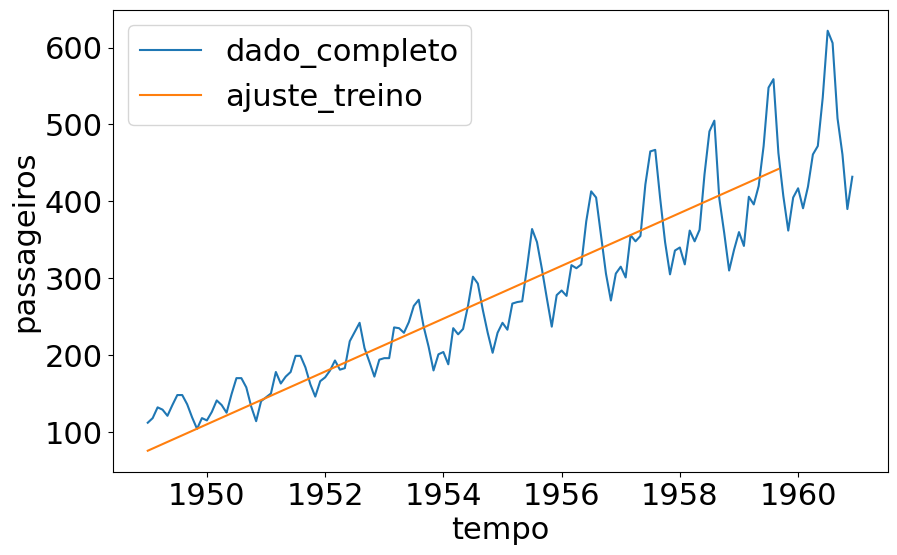

In [31]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultados_tranf, label='ajuste_treino')


In [32]:
y_predict_teste = regressor.predict(x_teste)

1/1 [==============================] - 0s 40ms/step


In [33]:
d = {'tempo' : x_teste,
     'passageiros' : y_predict_teste[:,0]     
}

In [34]:
resultados_teste = pd.DataFrame(data=d)

In [35]:
resultado_transf_teste = sc.inverse_transform(resultados_teste)

In [36]:
resultado_transf_teste = pd.DataFrame(data=resultado_transf_teste)

In [37]:
resultado_transf_teste.columns = ['tempo', 'passageiros']

<AxesSubplot: xlabel='tempo', ylabel='passageiros'>

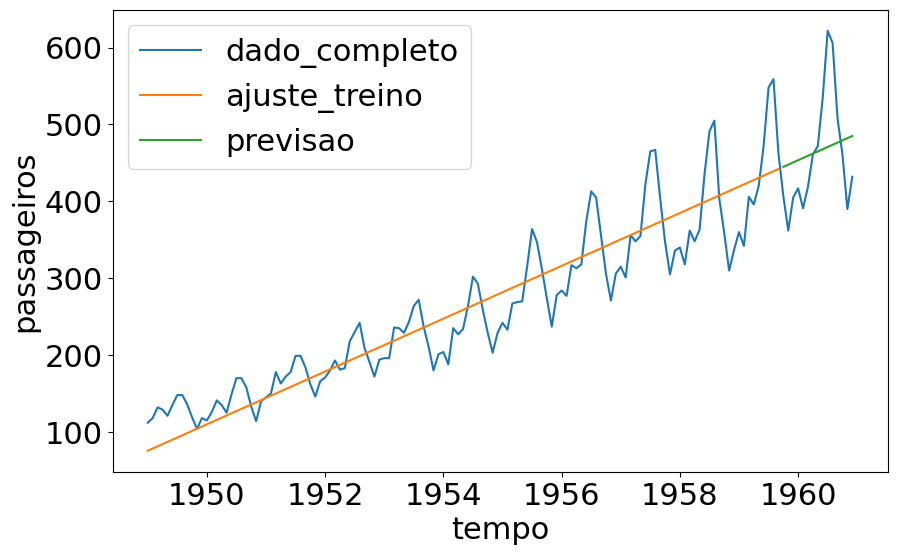

In [38]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultados_tranf, label='ajuste_treino')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf_teste, label='previsao')

In [39]:
regressor_2 = Sequential()

In [40]:
regressor_2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor_2.add(Dense(8, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor_2.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [41]:
regressor_2.compile(loss='mean_squared_error', optimizer='adam')

In [42]:
regressor_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [43]:
regressor_2.fit(x_treino, y_treino, epochs=500)

Epoch 1/500
5/5 [==============================] - 1s 3ms/step - loss: 0.7968
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7921
Epoch 3/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7905
Epoch 4/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7890
Epoch 5/500
5/5 [==============================] - 0s 4ms/step - loss: 0.7891
Epoch 6/500
5/5 [==============================] - 0s 5ms/step - loss: 0.7897
Epoch 7/500
5/5 [==============================] - 0s 5ms/step - loss: 0.7894
Epoch 8/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7884
Epoch 9/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7875
Epoch 10/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7866
Epoch 11/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7863
Epoch 12/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7857
Epoch 13/500
5/5 [==============================] - 0s 3ms/st

In [44]:
y_predict = regressor_2.predict(x_treino)

5/5 [==============================] - 0s 1ms/step


In [45]:
y_predict_teste = regressor_2.predict(x_teste)

1/1 [==============================] - 0s 34ms/step


<AxesSubplot: >

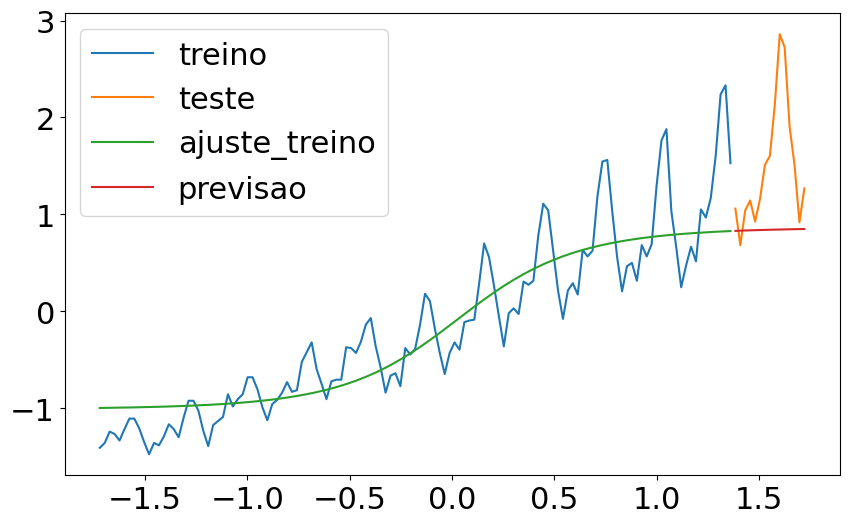

In [46]:
sns.lineplot(x=x_treino, y=y_treino, label='treino')
sns.lineplot(x=x_teste, y=y_teste, label='teste')
sns.lineplot(x=x_treino, y=y_predict[:,0], label='ajuste_treino')
sns.lineplot(x=x_teste, y=y_predict_teste[:,0], label='previsao')

In [47]:
import numpy as np

In [48]:
def separa_dados(vetor, n_passos):
    x_novo, y_novo = [], []
    for i in range(n_passos, vetor.shape[0]):
        x_novo.append(list(vetor.loc[i-n_passos:i-1]))
        y_novo.append(vetor.loc[i])
    x_novo, y_novo = np.array(x_novo), np.array(y_novo)
    return x_novo, y_novo

In [49]:
vetor = pd.DataFrame(y_treino)[0]

In [50]:
x_treino_novo, y_treino_novo = separa_dados(vetor, 1)

In [54]:
x_treino_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [55]:
y_treino_novo[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [56]:
vetor_2 = pd.DataFrame(y_teste)[0]

In [57]:
x_teste_novo, y_teste_novo = separa_dados(vetor_2, 1)

In [58]:
regressor_3 = Sequential()

In [60]:
regressor_3.add(Dense(8, input_dim=1, kernel_initializer='ones', activation='linear', use_bias=False))
regressor_3.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor_3.add(Dense(64, kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [61]:
regressor_3.compile(loss='mean_squared_error', optimizer='adam')

In [62]:
regressor_3.fit(x_treino_novo, y_treino_novo, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 3ms/step - loss: 0.7989
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7744
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7633
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7561
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7480
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7400
Epoch 7/100
4/4 [==============================] - 0s 21ms/step - loss: 0.7290
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7154
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6996
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6840
Epoch 11/100
4/4 [==============================] - 0s 8ms/step - loss: 0.6663
Epoch 12/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6426
Epoch 13/100
4/4 [==============================] - 0s 6ms/s

In [63]:
y_predict_novo = regressor_3.predict(x_treino_novo)

4/4 [==============================] - 0s 2ms/step


<AxesSubplot: xlabel='tempo', ylabel='0'>

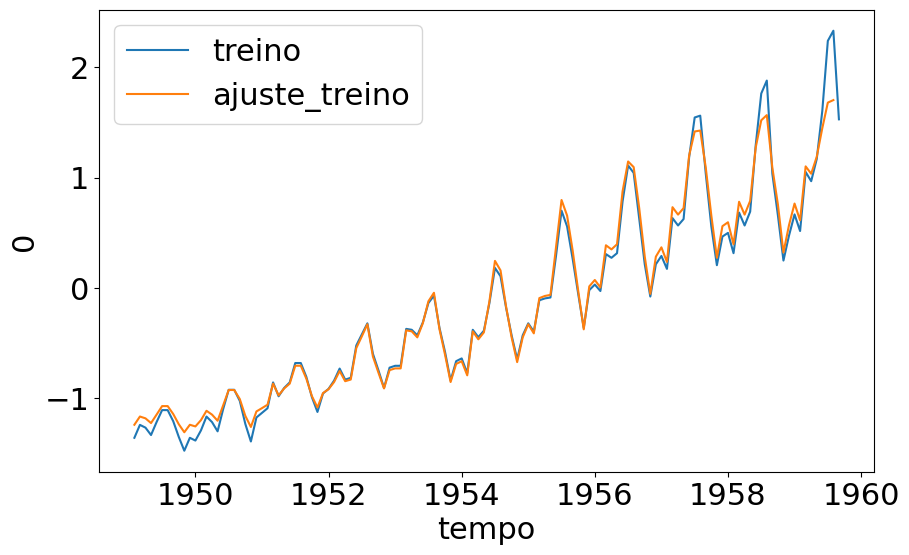

In [64]:
sns.lineplot(x='tempo', y=y_treino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste_treino')

In [65]:
y_predict_teste_novo = regressor_3.predict(x_teste_novo)

1/1 [==============================] - 0s 79ms/step


In [66]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<AxesSubplot: xlabel='tempo', ylabel='0'>

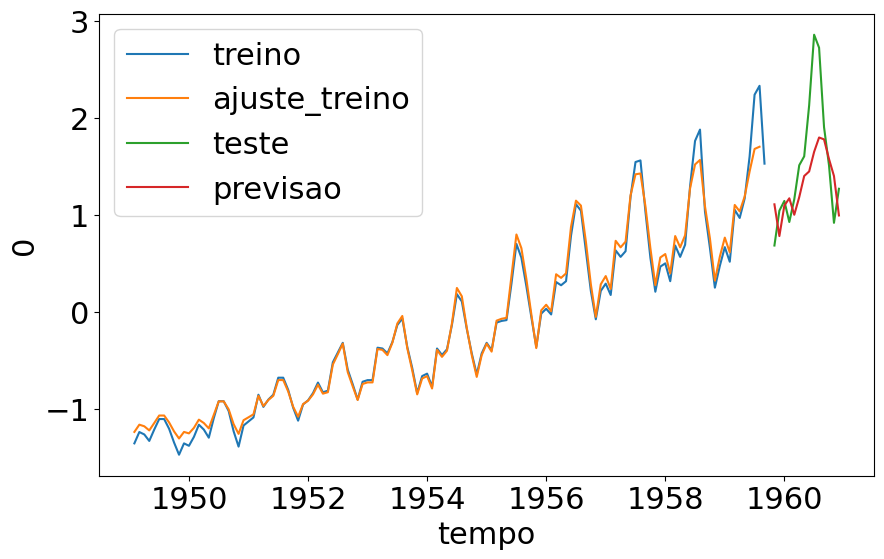

In [67]:
sns.lineplot(x='tempo', y=y_treino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=y_teste_novo, data=passageiros[130:144], label='teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[130:144], label='previsao')